## File exploration and problem Definition

In this guided project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle by user orgesleka.
The original dataset isn't available on Kaggle anymore, but you can find it here.

We've made a few modifications from the original dataset:

We sampled 50,000 data points from the full dataset, to ensure your code runs quickly in our hosted environment
We dirtied the dataset a bit to more closely resemble what you would expect from a scraped dataset (the version uploaded to Kaggle was cleaned to be easier to work with)
The data dictionary provided with data is as follows:

dateCrawled - When this ad was first crawled. All field-values are taken from this date.
name - Name of the car.
seller - Whether the seller is private or a dealer.
offerType - The type of listing
price - The price on the ad to sell the car.
abtest - Whether the listing is included in an A/B test.
vehicleType - The vehicle Type.
yearOfRegistration - The year in which the car was first registered.
gearbox - The transmission type.
powerPS - The power of the car in PS.
model - The car model name.
kilometer - How many kilometers the car has driven.
monthOfRegistration - The month in which the car was first registered.
fuelType - What type of fuel the car uses.
brand - The brand of the car.
notRepairedDamage - If the car has a damage which is not yet repaired.
dateCreated - The date on which the eBay listing was created.
nrOfPictures - The number of pictures in the ad.
postalCode - The postal code for the location of the vehicle.
lastSeenOnline - When the crawler saw this ad last online.
The aim of this project is to clean the data and analyze the included used car listings. You'll also become familiar with some of the unique benefits jupyter notebook provides for pandas.

Let's start by importing the libraries we need and reading the dataset into pandas.

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import file read csv
autos = pd.read_csv('autos.csv',encoding='Latin-1')

In [3]:
# explore dataset
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [5]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [6]:
autos.describe()

,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [7]:
autos.keys()

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

1. The file has 50k rows and 20 columns. 
2. Most columns are dtype obejcts. 5 columns are int64: yearOfRegisration, powerPS, monthOfRegistration, nrOfPictures, postalCode. 
3. Columns with null values: vehicleType, gearbox, model, fuelType, notRepairedDamage. No column has more than 20% of null values
4. Columns that should have numeric values that should be cleaned to get to the correct number value: price, odometer. 5. Columns that should be easily translated from German into English?
6. The file uses camelcase instead of Python's more favorable snakecase, which means we can't just replace spaces with underscores.

### General Investigation and Cleanup

In [8]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [9]:
new_columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [10]:
autos.columns = new_columns

In [11]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In order to have column names that work better and are more readable in Python we shifted the naming convention from camelcase to snakecase  as Python prefers underscores

In [12]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-05 16:57:05,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [13]:
autos["seller"].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [14]:
autos["offer_type"].value_counts()

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

1. Checking into unique value counts and it seems like "seller" and "offer_type" are candidates to be dropped as they are mostly just one value
2. Columns price and odomter need to be cleaned up to become proper numeric values

In [15]:
autos["odometer"] = autos["odometer"].str.replace(',','').str.replace('km','').astype(int)
autos["price"] = autos["price"].str.replace(',','').str.replace('$','').astype(int)

In [16]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [17]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,5.000000e+04,50000,44905,50000.000000,47320,50000.000000,47242,50000.000000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-05 16:57:05,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,9.840044e+03,NaN,NaN,2005.073280,NaN,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,4.811044e+05,NaN,NaN,105.712813,NaN,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [18]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
date_crawled          50000 non-null object
name                  50000 non-null object
seller                50000 non-null object
offer_type            50000 non-null object
price                 50000 non-null int64
ab_test               50000 non-null object
vehicle_type          44905 non-null object
registration_year     50000 non-null int64
gearbox               47320 non-null object
power_ps              50000 non-null int64
model                 47242 non-null object
odometer              50000 non-null int64
registration_month    50000 non-null int64
fuel_type             45518 non-null object
brand                 50000 non-null object
unrepaired_damage     40171 non-null object
ad_created            50000 non-null object
nr_of_pictures        50000 non-null int64
postal_code           50000 non-null int64
last_seen             50000 non-null object
dtypes: int64(7), 

In [19]:
autos.rename({"odometer":"odometer_km"}, axis = 1 , inplace= True)

Columns price and odomoter have become int columns now

## Exploring Odometer and Price

### Price column specific cleanup

In [20]:
autos["price"].unique().shape
# There are 2357 unique values, quite a large number

(2357,)

In [21]:
autos["price"].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [22]:
autos["price"].value_counts(ascending=False).head(20)

0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
700      395
4500     394
300      384
2200     382
950      379
Name: price, dtype: int64

In [23]:
autos["price"].sort_values(ascending=True).head(20)

18089    0
43923    0
15225    0
29499    0
8445     0
38832    0
43925    0
8438     0
35821    0
31332    0
12819    0
33620    0
15208    0
2481     0
4266     0
27020    0
35819    0
31336    0
29482    0
47861    0
Name: price, dtype: int64

In [24]:
autos["price"].sort_values(ascending=False).head(30)

39705    99999999
42221    27322222
39377    12345678
47598    12345678
27371    12345678
2897     11111111
24384    11111111
11137    10000000
47634     3890000
7814      1300000
22947     1234566
43049      999999
514        999999
37585      999990
36818      350000
14715      345000
34723      299000
35923      295000
12682      265000
47337      259000
38299      250000
37840      220000
40918      198000
43668      197000
28090      194000
20351      190000
17140      180000
11433      175000
32840      169999
18509      169000
Name: price, dtype: int64

In [25]:
autos["price"].max()

99999999

In [26]:
autos["price"].min()

0

1. We are going to keep values at 1 dollar as eBay is an auction site and some cars may actually start the auction at that price. Regarding max price we are going to cap it at 350k as the price seems to be steadily rising all the way there to then jump to much higher values above 1M

In [27]:
autos = autos[autos["price"].between(1,351000)]
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

### Odometer Km column specific cleanup

In [28]:
autos["odometer_km"].unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000,   5000, 100000,  40000])

In [29]:
autos["odometer_km"].describe()

count     48565.000000
mean     125770.101925
std       39788.636804
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [30]:
autos["odometer_km"].value_counts(ascending=False).head(20)

150000    31414
125000     5057
100000     2115
90000      1734
80000      1415
70000      1217
60000      1155
50000      1012
5000        836
40000       815
30000       780
20000       762
10000       253
Name: odometer_km, dtype: int64

In [31]:
autos["odometer_km"].sort_values(ascending=True).head(20)

21416    5000
8215     5000
35009    5000
8227     5000
20374    5000
26877    5000
38899    5000
1866     5000
49581    5000
40158    5000
26837    5000
20400    5000
1905     5000
20401    5000
17079    5000
20408    5000
1835     5000
26789    5000
30584    5000
12076    5000
Name: odometer_km, dtype: int64

In [32]:
autos["odometer_km"].sort_values(ascending=False).head(20)

49999    150000
20207    150000
20203    150000
20202    150000
20201    150000
20200    150000
20199    150000
20198    150000
20196    150000
20195    150000
20193    150000
20191    150000
20190    150000
20189    150000
20188    150000
20186    150000
20182    150000
20206    150000
20208    150000
20129    150000
Name: odometer_km, dtype: int64

1. There are 13 unique values, quite a low number. Values seem to be rounded to fit into these 13 bands.
2. Values seem to be jumping progressively from 5k to 10k, then 10k steps to 100k then 25k steps to 150k. There are also clearly more vehicles with higher mileage than low mileage ones.
3. Overall values seem plausible and distribution makes sense, no values should be removed from this column.

## Exploring date columns

In our earlier exploration with describe() we noticed that some date columns are seen by pandas right now as strings instead of date formats. We need extra processing to clean them into dates.

In [33]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


### Exploring date_crawled

In [34]:
print(autos["date_crawled"].str[:10].value_counts(normalize=True, dropna=False))
# we select the first 10 characters so we can take a look at the daily distribution. Lot of values representing ~3%.

2016-04-03    0.038608
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-12    0.036920
2016-03-14    0.036549
2016-04-04    0.036487
2016-03-07    0.036014
2016-04-02    0.035478
2016-03-28    0.034860
2016-03-19    0.034778
2016-03-15    0.034284
2016-03-29    0.034099
2016-04-01    0.033687
2016-03-30    0.033687
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-22    0.032987
2016-03-11    0.032575
2016-03-23    0.032225
2016-03-26    0.032204
2016-03-10    0.032184
2016-03-31    0.031834
2016-03-17    0.031628
2016-03-25    0.031607
2016-03-27    0.031092
2016-03-16    0.029610
2016-03-24    0.029342
2016-03-05    0.025327
2016-03-13    0.015670
2016-03-06    0.014043
2016-04-05    0.013096
2016-03-18    0.012911
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64


In [35]:
print(autos["date_crawled"].str[:10].sort_values(ascending=True).head(20))

11549    2016-03-05
22090    2016-03-05
1012     2016-03-05
5688     2016-03-05
28221    2016-03-05
2290     2016-03-05
22146    2016-03-05
16165    2016-03-05
28211    2016-03-05
2294     2016-03-05
41386    2016-03-05
33548    2016-03-05
22151    2016-03-05
16140    2016-03-05
9058     2016-03-05
46989    2016-03-05
30749    2016-03-05
45216    2016-03-05
33566    2016-03-05
22034    2016-03-05
Name: date_crawled, dtype: object


In [36]:
print(autos["date_crawled"].str[:10].sort_values(ascending=False).head(20))

47885    2016-04-07
30601    2016-04-07
44797    2016-04-07
8576     2016-04-07
43691    2016-04-07
16358    2016-04-07
27059    2016-04-07
26209    2016-04-07
29853    2016-04-07
361      2016-04-07
10765    2016-04-07
41677    2016-04-07
49057    2016-04-07
23409    2016-04-07
22899    2016-04-07
11538    2016-04-07
14150    2016-04-07
3654     2016-04-07
47588    2016-04-07
20941    2016-04-07
Name: date_crawled, dtype: object


In [37]:
print(autos["date_crawled"].str[:10].unique().shape)
print(autos["date_crawled"].str[:10].unique())

(34,)
['2016-03-26' '2016-04-04' '2016-03-12' '2016-04-01' '2016-03-21'
 '2016-03-20' '2016-03-16' '2016-03-22' '2016-03-15' '2016-03-31'
 '2016-03-23' '2016-03-29' '2016-03-17' '2016-03-05' '2016-03-06'
 '2016-03-28' '2016-03-10' '2016-04-03' '2016-03-19' '2016-04-02'
 '2016-03-14' '2016-04-05' '2016-03-11' '2016-03-07' '2016-03-08'
 '2016-03-27' '2016-03-09' '2016-03-25' '2016-03-18' '2016-03-30'
 '2016-03-24' '2016-03-13' '2016-04-06' '2016-04-07']


For date_crawled there are 34 unique values only, spread between roughly one month mar'16 to the first week of apr'16

### Exploring Last Seen

In [38]:
print(autos["last_seen"].str[:10].value_counts(normalize=True, dropna=False))

2016-04-06    0.221806
2016-04-07    0.131947
2016-04-05    0.124761
2016-03-17    0.028086
2016-04-03    0.025203
2016-04-02    0.024915
2016-03-30    0.024771
2016-04-04    0.024483
2016-03-12    0.023783
2016-03-31    0.023783
2016-04-01    0.022794
2016-03-29    0.022341
2016-03-22    0.021373
2016-03-28    0.020859
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-23    0.018532
2016-03-26    0.016802
2016-03-16    0.016452
2016-03-15    0.015876
2016-03-19    0.015834
2016-03-27    0.015649
2016-03-14    0.012602
2016-03-11    0.012375
2016-03-10    0.010666
2016-03-09    0.009595
2016-03-13    0.008895
2016-03-08    0.007413
2016-03-18    0.007351
2016-03-07    0.005395
2016-03-06    0.004324
2016-03-05    0.001071
Name: last_seen, dtype: float64


In [39]:
print(autos["last_seen"].str[:10].unique().shape)
print(autos["last_seen"].str[:10].unique())
print(autos["last_seen"].str[:10].max())
print(autos["last_seen"].str[:10].min())

(34,)
['2016-04-06' '2016-03-15' '2016-04-01' '2016-03-23' '2016-04-07'
 '2016-03-26' '2016-03-16' '2016-04-02' '2016-03-18' '2016-04-05'
 '2016-03-17' '2016-03-07' '2016-03-14' '2016-03-28' '2016-03-12'
 '2016-03-24' '2016-04-04' '2016-03-30' '2016-03-08' '2016-03-31'
 '2016-03-20' '2016-03-19' '2016-04-03' '2016-03-10' '2016-03-27'
 '2016-03-22' '2016-03-29' '2016-03-11' '2016-03-25' '2016-03-13'
 '2016-03-09' '2016-03-21' '2016-03-06' '2016-03-05']
2016-04-07
2016-03-05


1. Few values seem to be making most of the distribution and those are the last 3 days? 04/05 thru 0/07. It's unlikely that there was a massive spike in sales, and more likely that these values are to do with the crawling period ending and don't indicate car sales.
2. Like for date_crawled last_seen spans between 03/05/2016 and 04/07/2016

### Exploring ad_created

In [40]:
print(autos["ad_created"].str[:10].value_counts(normalize=True, dropna=False))

2016-04-03    0.038855
2016-03-20    0.037949
2016-03-21    0.037579
2016-04-04    0.036858
2016-03-12    0.036755
                ...   
2015-12-30    0.000021
2016-02-22    0.000021
2015-12-05    0.000021
2015-09-09    0.000021
2016-02-17    0.000021
Name: ad_created, Length: 76, dtype: float64


In [41]:
print(autos["ad_created"].str[:10].unique().shape)
print(autos["ad_created"].str[:10].unique())
print(autos["ad_created"].str[:10].max())
print(autos["ad_created"].str[:10].min())

(76,)
['2016-03-26' '2016-04-04' '2016-03-12' '2016-04-01' '2016-03-21'
 '2016-03-20' '2016-03-16' '2016-03-22' '2016-03-14' '2016-03-31'
 '2016-03-23' '2016-03-29' '2016-03-17' '2016-03-05' '2016-03-06'
 '2016-03-28' '2016-03-10' '2016-04-03' '2016-03-19' '2016-04-02'
 '2016-03-15' '2016-04-05' '2016-03-11' '2016-03-07' '2016-03-08'
 '2016-03-27' '2016-03-09' '2016-03-25' '2016-03-18' '2016-03-30'
 '2016-03-24' '2016-03-13' '2016-04-06' '2016-03-04' '2016-04-07'
 '2016-02-24' '2016-03-02' '2016-02-29' '2016-01-03' '2015-11-10'
 '2016-03-01' '2016-03-03' '2016-02-28' '2016-01-27' '2016-02-19'
 '2016-02-25' '2016-02-23' '2016-02-14' '2016-02-12' '2016-01-29'
 '2016-02-05' '2016-01-22' '2016-02-01' '2016-02-02' '2016-02-17'
 '2016-02-21' '2015-08-10' '2015-06-11' '2016-02-11' '2016-01-14'
 '2016-01-10' '2016-02-08' '2015-12-05' '2016-02-27' '2016-02-22'
 '2016-01-13' '2015-09-09' '2016-02-20' '2016-01-16' '2015-12-30'
 '2016-02-07' '2016-01-07' '2016-02-26' '2016-02-18' '2016-02-09'
 '20

1. Like date_crawled distribution seems more even, but there the time horizon is longer as expected. we crawl on some dates, but some live ads might have been created prior to that. 76 days instead of 34 so almost twice as many days.
2. Max value is still 04/07/2016 like the other date columns, min values almost a year older though: 06/11/2015

### Exporing Registration Year

In [42]:
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [43]:
print(autos["registration_year"].value_counts(normalize=True, dropna=False).head(50))

2000    0.064985
2005    0.060455
1999    0.059652
2004    0.055657
2003    0.055575
2006    0.054978
2001    0.054278
2002    0.051189
1998    0.048656
2007    0.046886
2008    0.045609
2009    0.042932
1997    0.040173
2011    0.033419
2010    0.032719
2017    0.028663
1996    0.028271
2012    0.026974
1995    0.025265
2016    0.025121
2013    0.016535
2014    0.013652
1994    0.012952
2018    0.009678
1993    0.008751
2015    0.008072
1992    0.007619
1990    0.007145
1991    0.006980
1989    0.003583
1988    0.002780
1985    0.001956
1980    0.001750
1987    0.001483
1986    0.001483
1984    0.001050
1983    0.001050
1978    0.000906
1982    0.000844
1970    0.000782
1979    0.000700
1972    0.000680
1981    0.000577
1968    0.000535
1967    0.000535
1971    0.000535
1974    0.000494
1973    0.000474
1960    0.000474
1977    0.000453
Name: registration_year, dtype: float64


In [44]:
print(autos["registration_year"].sort_values(ascending=False).head(20))

33950    9999
38076    9999
8012     9999
49910    9000
25003    8888
8360     6200
27618    5911
24519    5000
49153    5000
22799    5000
4164     5000
42079    4800
453      4500
4549     4100
27578    2800
49185    2019
5763     2019
32040    2018
17928    2018
44772    2018
Name: registration_year, dtype: int64


In [45]:
print(autos["registration_year"].sort_values(ascending=True).head(30))

22316    1000
49283    1001
24511    1111
32585    1800
10556    1800
22659    1910
45157    1910
30781    1910
28693    1910
3679     1910
21416    1927
22101    1929
11246    1931
2221     1934
2573     1934
39725    1937
21421    1937
23804    1937
26607    1937
26103    1938
24855    1939
13963    1941
25792    1941
11585    1943
11047    1948
32091    1950
1171     1950
14020    1950
44406    1951
35921    1951
Name: registration_year, dtype: int64


In [46]:
print(autos["registration_year"].unique().shape)
print(autos["registration_year"].unique())
print(autos["registration_year"].max())
print(autos["registration_year"].min())

(95,)
[2004 1997 2009 2007 2003 2006 1995 1998 2000 2017 2010 1999 1982 1990
 2015 2014 1996 1992 2002 2012 2011 2005 2008 1985 2016 1994 1986 2001
 2018 2013 1972 1993 1988 1989 1973 1967 1976 4500 1987 1991 1983 1960
 1969 1950 1978 1980 1984 1963 1977 1961 1968 1934 1965 1971 1966 1979
 1981 1970 1974 1910 1975 5000 4100 2019 1956 9999 6200 1964 1959 1958
 1800 1948 1931 1943 1941 1962 1927 1937 1929 1000 1957 1952 1111 1955
 1939 8888 1954 1938 2800 5911 1953 1951 4800 1001 9000]
9999
1000


1. There are clearly some unrealistic values when cars where not invented yet or in the future.
2. All values after 2016 should be dropped?
3. All values before 1910 should be dropped too at minimum. we could even be more aggressive and remove cars that are too old like before 1960 if they don't make enough values and none of them seem to account for more than 0.05% of the dataset so not a big loss.

### Dealing with Incorrect Registration Year Data

As per above markdown we will exclude all registration years post 2016 and pre-1960. There were definitely cars before 1960 but it seems their number is very low (below 4% of total data) in this dataset so we will not consider them.

In [47]:
(~autos["registration_year"].between(1960,2016)).sum() / autos.shape[0]

0.0397611448574076

In [48]:
# Many ways to select rows in a dataframe that fall within a value range for a column.
# Using `Series.between()` is one way.
autos = autos[autos["registration_year"].between(1900,2016)]
autos["registration_year"].value_counts(normalize=True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64

## Explore Brands

In [49]:
print(autos["brand"].describe())
print(autos["brand"].value_counts(normalize=True, dropna=False).head(50))

count          46681
unique            40
top       volkswagen
freq            9862
Name: brand, dtype: object
volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.00209

In [50]:
brand_counts = autos["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)
# keep only values making top 20 or 95% of values or at least 5% of values each
# we get 6 brands as a result

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


In [51]:
common_brands_prices = {}
for c in common_brands:
    brand_only = autos[autos["brand"] == c ]
    mean_brand = brand_only["price"].mean()
    common_brands_prices[c] = int(mean_brand)
print(common_brands_prices)

{'volkswagen': 5402, 'bmw': 8332, 'opel': 2975, 'mercedes_benz': 8628, 'audi': 9336, 'ford': 3749}


1. There is quite some difference in prices across brands. Opel & Ford are way cheaper then Audi, Mercedes & BMW, with VW in the middle

In [52]:
# calculate average price by each brand
autos.groupby(["brand"])["price"].mean().sort_values(ascending=False)

brand
porsche           45643.937063
land_rover        19108.091837
sonstige_autos    12338.550218
jeep              11650.500000
jaguar            11635.493151
mini              10613.459658
audi               9336.687454
mercedes_benz      8628.450366
bmw                8332.820518
chevrolet          6684.139098
skoda              6368.000000
kia                5982.330303
dacia              5915.528455
volkswagen         5402.410262
hyundai            5365.254274
toyota             5167.091062
volvo              4946.501171
nissan             4743.402525
seat               4397.230950
mazda              4112.596615
honda              4107.857923
suzuki             4096.732852
alfa_romeo         4087.690323
subaru             3953.290000
citroen            3779.139144
ford               3749.469507
smart              3580.223903
chrysler           3465.743902
mitsubishi         3394.572917
lancia             3376.220000
saab               3211.649351
peugeot            3094.017229
op

## Exploring Mileage

In [53]:
bmp_series = pd.Series(common_brands_prices)
print(bmp_series)

volkswagen       5402
bmw              8332
opel             2975
mercedes_benz    8628
audi             9336
ford             3749
dtype: int64


In [54]:
common_brands_dataset = pd.DataFrame(bmp_series, columns=["mean_price"])
print(common_brands_dataset)

               mean_price
volkswagen           5402
bmw                  8332
opel                 2975
mercedes_benz        8628
audi                 9336
ford                 3749


In [55]:
common_brands_mileage = {}
for c in common_brands:
    brand_only = autos[autos["brand"] == c ]
    mean_brand_mileage = brand_only["odometer_km"].mean()
    common_brands_mileage[c] = int(mean_brand_mileage)
print(common_brands_mileage)

{'volkswagen': 128707, 'bmw': 132572, 'opel': 129310, 'mercedes_benz': 130788, 'audi': 129157, 'ford': 124266}


In [56]:
km_series = pd.Series(common_brands_mileage)
print(km_series)

volkswagen       128707
bmw              132572
opel             129310
mercedes_benz    130788
audi             129157
ford             124266
dtype: int64


In [57]:
common_brands_dataset["mileage"] = km_series
print(common_brands_dataset)

               mean_price  mileage
volkswagen           5402   128707
bmw                  8332   132572
opel                 2975   129310
mercedes_benz        8628   130788
audi                 9336   129157
ford                 3749   124266


1. Mileage does not vary as much as prices depending on the brand, actually it's pretty stable --> people use more expensive cars in the same way as cheaper ones? 
2. Slight trend that more expensive cars have higher mileage. Why?

## Additional Cleaning steps

### Translate from German

In [58]:
autos.head()
# candidates to be translated: 
# 1) vehicle_type,
# 2) gearbox (manuell vs automatik)
# 3) fuel type
# 4) unrepaired damage
# 5) ignoring offer_type Angebot as it is the only value

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [59]:
print(autos["fuel_type"].value_counts(normalize=True))
# get translations for benzin, lpg, cng, andere
fuel_type_translations = {"benzin":"gas", 
                          "andere":"other",
                          "lpg":"liquified natural gas", 
                          "cng":"compressed natural gas", 
                          "elektro":"electric"
                                 }
for german, english in fuel_type_translations.items():
    autos["fuel_type"] = autos["fuel_type"].str.replace(german, english, regex=False)
print(autos["fuel_type"].unique())

benzin     0.658165
diesel     0.323594
lpg        0.014967
cng        0.001637
hybrid     0.000853
elektro    0.000438
andere     0.000346
Name: fuel_type, dtype: float64
['liquified natural gas' 'gas' 'diesel' nan 'compressed natural gas'
 'hybrid' 'electric' 'other']


In [60]:
print(autos["gearbox"].value_counts(normalize=True))
# translate 
gearbox_translations = {"manuell":"manual", "automatik":"automatic"}

for german, english in gearbox_translations.items():
    autos["gearbox"] = autos["gearbox"].str.replace(german, english, regex=False)
print(autos["gearbox"].value_counts(normalize=True))

manuell      0.77887
automatik    0.22113
Name: gearbox, dtype: float64
manual       0.77887
automatic    0.22113
Name: gearbox, dtype: float64


In [61]:
print(autos["vehicle_type"].value_counts(normalize=True))
# find translations for kleinwagen, kombi, limousine which has a different meaning in German
vehicle_type_translations = {"kleinwagen":"compact car", "kombi":"van", "limousine":"sedan"}

for german, english in vehicle_type_translations.items():
    autos["vehicle_type"] = autos["vehicle_type"].str.replace(german, english, regex=False)
print(autos["vehicle_type"].value_counts(normalize=True))

limousine     0.286468
kleinwagen    0.240694
kombi         0.203061
bus           0.091662
cabrio        0.068581
coupe         0.055984
suv           0.044682
andere        0.008868
Name: vehicle_type, dtype: float64
sedan          0.286468
compact car    0.240694
van            0.203061
bus            0.091662
cabrio         0.068581
coupe          0.055984
suv            0.044682
andere         0.008868
Name: vehicle_type, dtype: float64


In [62]:
print(autos["unrepaired_damage"].value_counts(normalize=True))
# find translations for nein, ja
translations = {"nein":"no", "ja":"yes"}

for german, english in translations.items():
    autos["unrepaired_damage"] = autos["unrepaired_damage"].str.replace(german, english, regex=False)
print(autos["unrepaired_damage"].value_counts(normalize=True))

nein    0.881691
ja      0.118309
Name: unrepaired_damage, dtype: float64
no     0.881691
yes    0.118309
Name: unrepaired_damage, dtype: float64


### Convert dates to be uniform numeric data

In [63]:
print(autos[["date_crawled","last_seen","ad_created"]].head())
# print columns to edit to get to a numeric format for dates
autos["date_crawled"] = autos["date_crawled"].str[:10].str.replace('-','').astype(int)
autos["last_seen"] = autos["last_seen"].str[:10].str.replace('-','').astype(int)
autos["ad_created"] = autos["ad_created"].str[:10].str.replace('-','').astype(int)
# .str.replace(',','').str.replace('km','').astype(int)
# keep data only up to the day and replace - with nothing
# .str[:10]
print(autos[["date_crawled","last_seen","ad_created"]].head())

          date_crawled            last_seen           ad_created
0  2016-03-26 17:47:46  2016-04-06 06:45:54  2016-03-26 00:00:00
1  2016-04-04 13:38:56  2016-04-06 14:45:08  2016-04-04 00:00:00
2  2016-03-26 18:57:24  2016-04-06 20:15:37  2016-03-26 00:00:00
3  2016-03-12 16:58:10  2016-03-15 03:16:28  2016-03-12 00:00:00
4  2016-04-01 14:38:50  2016-04-01 14:38:50  2016-04-01 00:00:00
   date_crawled  last_seen  ad_created
0      20160326   20160406    20160326
1      20160404   20160406    20160404
2      20160326   20160406    20160326
3      20160312   20160315    20160312
4      20160401   20160401    20160401


### Find Keywords to be extracted as new columns

In [64]:
autos["model"].value_counts(normalize=True).head(50)

golf           0.083326
andere         0.075818
3er            0.058780
polo           0.036167
corsa          0.035785
passat         0.030323
astra          0.030300
a4             0.027670
c_klasse       0.025535
5er            0.025445
e_klasse       0.021534
a3             0.018544
a6             0.017915
focus          0.017128
fiesta         0.016229
transporter    0.015150
twingo         0.013824
2_reihe        0.013487
fortwo         0.012363
vectra         0.012228
a_klasse       0.012116
1er            0.011711
3_reihe        0.010924
mondeo         0.010767
clio           0.010632
touran         0.009733
punto          0.009328
zafira         0.008856
ka             0.007845
megane         0.007530
ibiza          0.007373
lupo           0.007238
octavia        0.006856
x_reihe        0.006653
fabia          0.006294
cooper         0.006092
micra          0.005462
clk            0.005440
sharan         0.004990
caddy          0.004586
80             0.004451
leon           0

## Additional Analysis steps

### Find most common brand/model combinations

In [65]:
autos["brand_model"] = autos["brand"] + '-' + autos["model"]
# create a new column
print(autos["brand_model"])

0         peugeot-andere
1                bmw-7er
2        volkswagen-golf
3           smart-fortwo
4             ford-focus
              ...       
49995            audi-q5
49996         opel-astra
49997           fiat-500
49998            audi-a3
49999        opel-vectra
Name: brand_model, Length: 46681, dtype: object


In [66]:
print(autos["brand_model"].value_counts(normalize=True).head(10))

volkswagen-golf           0.083326
bmw-3er                   0.058780
volkswagen-polo           0.036167
opel-corsa                0.035785
volkswagen-passat         0.030323
opel-astra                0.030300
audi-a4                   0.027670
mercedes_benz-c_klasse    0.025535
bmw-5er                   0.025445
mercedes_benz-e_klasse    0.021534
Name: brand_model, dtype: float64


The most 5 common cars are: 
1. VW Golf
2. BMW 3 Series
3. VW Polo
4. Opel Corsa
5. VW Passat

VW has 3/5 most popilar cars. Mercedes and Audi are both out of the top 5, but Mercedes has two cars in top 10, as manu as Opel and BMW, while Audi has only one.

### Split the odometer_km into groups use aggregation to see if average prices follow any pattersn based on mileage

### How much cheaper are cars with damage than their non-damaged counterparts?

In [67]:
damage = autos["unrepaired_damage"].value_counts(normalize=True).keys()
damage_prices = {}
for c in damage:
    repaired = autos[autos["unrepaired_damage"] == c]
    mean_repaired_price = repaired["price"].mean()
    damage_prices[c] = mean_repaired_price
print(damage_prices)

{'no': 7164.033102796004, 'yes': 2241.146035242291}


Yes, cars with no damage or at least no unrepaired damage sell at over 3x the price of cars with unrepaired damages.
We can go deeper and analyze the same car model for the top 10 models and/or brands and see differences are larger.

In [68]:
# check price difference for common brands
common_brands_repaired_price = {}
for c in common_brands:
    common_brand_cars = autos[autos["brand"] == c]
    common_brands_repaired = common_brand_cars[common_brand_cars["unrepaired_damage"]=='no']
    c_b_repaired_price = common_brands_repaired["price"].mean()
    common_brands_repaired_price[c] = c_b_repaired_price

common_brands_unrepaired_price = {}
for c in common_brands:
    common_brand_cars = autos[autos["brand"] == c]
    common_brands_repaired = common_brand_cars[common_brand_cars["unrepaired_damage"]=='yes']
    c_b_repaired_price = common_brands_repaired["price"].mean()
    common_brands_unrepaired_price[c] = c_b_repaired_price
    
print(common_brands_repaired_price)
print(common_brands_unrepaired_price)

{'volkswagen': 6469.407758742744, 'bmw': 9437.709979736575, 'opel': 3660.5283018867926, 'mercedes_benz': 9798.396536796537, 'audi': 10914.959856396867, 'ford': 4660.33211512106}
{'volkswagen': 2179.4056603773583, 'bmw': 3512.637717121588, 'opel': 1367.0321489001692, 'mercedes_benz': 3921.8192419825073, 'audi': 3324.6846846846847, 'ford': 1375.4855072463768}


In [69]:
# create a mini dataframe to compare prices between makes
common_brands_repaired_series = pd.Series(common_brands_repaired_price)
# print(common_brands_repaired_series)

common_brands_data = pd.DataFrame(common_brands_repaired_series, columns=['repaired_price'])
# print(common_brands_data)

common_brands_unrepaired_series = pd.Series(common_brands_unrepaired_price)
# print(common_brands_unrepaired_series)

common_brands_data['unrepaired_price'] = common_brands_unrepaired_series
common_brands_data.head()

,repaired_price,unrepaired_price
volkswagen,6469.407759,2179.405660
bmw,9437.709980,3512.637717
opel,3660.528302,1367.032149
mercedes_benz,9798.396537,3921.819242
audi,10914.959856,3324.684685


In [70]:
# add a column for difference in price
common_brands_data['price_difference'] = (common_brands_data['repaired_price'] / common_brands_data['unrepaired_price'] ) -1
common_brands_data.head()

,repaired_price,unrepaired_price,price_difference
volkswagen,6469.407759,2179.405660,1.968428
bmw,9437.709980,3512.637717,1.686787
opel,3660.528302,1367.032149,1.677719
mercedes_benz,9798.396537,3921.819242,1.498431
audi,10914.959856,3324.684685,2.283006


In [71]:
bmp_series = pd.Series(common_brands_prices)
print(bmp_series)
common_brands_dataset = pd.DataFrame(bmp_series, columns=["mean_price"])
print(common_brands_dataset)

volkswagen       5402
bmw              8332
opel             2975
mercedes_benz    8628
audi             9336
ford             3749
dtype: int64
               mean_price
volkswagen           5402
bmw                  8332
opel                 2975
mercedes_benz        8628
audi                 9336
ford                 3749


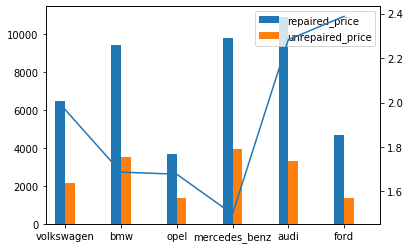

In [90]:
# put into a chart
width = .35 # width of a bar

common_brands_data[["repaired_price","unrepaired_price"]].plot(kind='bar', width = width)
common_brands_data['price_difference'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(common_brands_data['price_difference'])-width])
plt.show()

Cars from popular brands that have no unrepaired damages can easily be as much as 3x expensive compared vs damaged ones

In [94]:
# next step: adapt the above framework to model car 
car_model_counts = autos["model"].value_counts(normalize=True)
common_models = car_model_counts[car_model_counts > .01].index
# get all models that represent the at least 1% of the eBay German car market
print(common_models)

Index(['golf', 'andere', '3er', 'polo', 'corsa', 'passat', 'astra', 'a4',
       'c_klasse', '5er', 'e_klasse', 'a3', 'a6', 'focus', 'fiesta',
       'transporter', 'twingo', '2_reihe', 'fortwo', 'vectra', 'a_klasse',
       '1er', '3_reihe', 'mondeo', 'clio'],
      dtype='object')


In [98]:
# check price difference for common car models
common_models_repaired_price = {}
for c in common_models:
    common_models_cars = autos[autos["model"] == c]
    common_models_repaired = common_models_cars[common_models_cars["unrepaired_damage"]=='no']
    c_m_repaired_price = common_models_repaired["price"].mean()
    common_models_repaired_price[c] = c_m_repaired_price

common_models_unrepaired_price = {}
for c in common_models:
    common_models_unrepaired = autos[(autos["model"] == c) & (autos["unrepaired_damage"] =='yes')]
    # common_models_repaired = common_models_cars[common_models_cars["unrepaired_damage"]=='yes']
    c_m_unrepaired_price = common_models_unrepaired["price"].mean()
    common_models_unrepaired_price[c] = c_m_unrepaired_price
print(common_models_repaired_price)
print(common_models_unrepaired_price)

{'golf': 6092.48841554559, 'andere': 8405.935222672064, '3er': 6940.567987957853, 'polo': 3208.5811808118083, 'corsa': 2273.826589595376, 'passat': 5820.326153846154, 'astra': 3964.1687370600416, 'a4': 8175.672451193059, 'c_klasse': 7746.407079646017, '5er': 8882.866197183099, 'e_klasse': 9265.728169014084, 'a3': 9263.882352941177, 'a6': 9754.379139072847, 'focus': 4094.413237924866, 'fiesta': 3464.6751968503936, 'transporter': 11907.21626984127, 'twingo': 1761.5577889447236, '2_reihe': 3505.54, 'fortwo': 4011.6495327102803, 'vectra': 2221.0746268656717, 'a_klasse': 4558.894607843137, '1er': 12016.36, '3_reihe': 3614.7846607669617, 'mondeo': 3827.102893890675, 'clio': 2807.9577039274923}
{'golf': 1850.156351791531, 'andere': 2405.979274611399, '3er': 2325.6308411214955, 'polo': 1014.0795454545455, 'corsa': 1182.6107784431138, 'passat': 2183.734513274336, 'astra': 1314.605633802817, 'a4': 2943.366336633663, 'c_klasse': 3739.635135135135, '5er': 3926.7227722772277, 'e_klasse': 4427.34177

In [105]:
# put into a dataframe
common_models_repaired_series = pd.Series(common_models_repaired_price)
# print(common_models_repaired_series)

common_models_data = pd.DataFrame(common_models_repaired_series, columns=['repaired_price'])


common_models_unrepaired_series = pd.Series(common_models_unrepaired_price)
common_models_data['unrepaired_price'] = common_models_unrepaired_series
common_models_data.head()

,repaired_price,unrepaired_price
golf,6092.488416,1850.156352
andere,8405.935223,2405.979275
3er,6940.567988,2325.630841
polo,3208.581181,1014.079545
corsa,2273.826590,1182.610778


In [111]:
common_models_data['price_difference'] = (common_models_data['repaired_price']/common_models_data['unrepaired_price'])-1
common_models_viz = common_models_data.head()

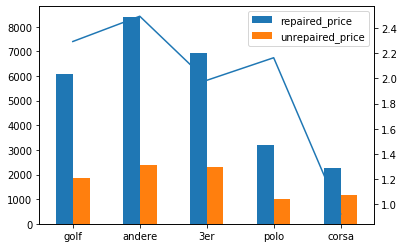

In [113]:
# put into a chart for the top5 models
width = .5 # width of a bar

common_models_viz[["repaired_price","unrepaired_price"]].plot(kind='bar', width = width)
common_models_viz['price_difference'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(common_models_viz['price_difference'])-width])
plt.show()

All top cars have a repaired price over 3x the damaged one, except for the Opel Corsa at 2x.